In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
from src.aux_function import *
import json
from pprint import pprint

fontSize = 15 # 22 generates the font more like the latex text
save_fig = True

### Experimento aaap

In [10]:
aaap = json.load(open("outputs/aaap.json"))

colors = colors = [Colors.random_color() for i in range(15)]

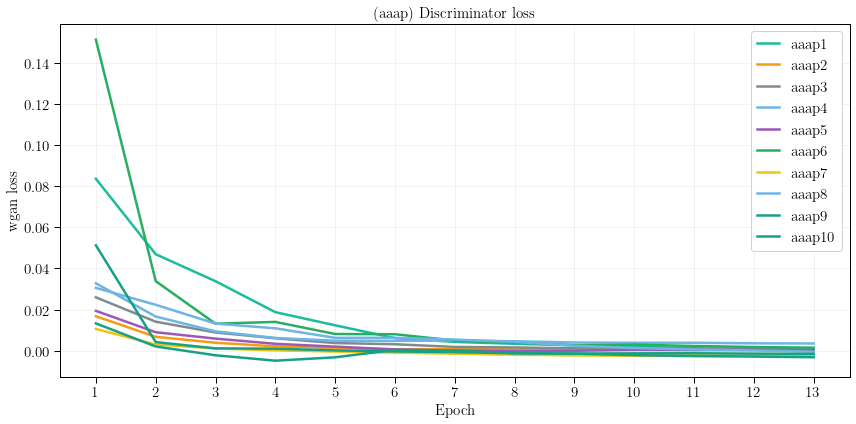

In [12]:
# Discriminator loss for the 10 models

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(aaap) Discriminator loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'wgan loss', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 14)
i = 0
for exp in aaap.keys():
    disc_loss = []
    for epoch in aaap[exp].keys():
        disc_loss.append(aaap[exp][epoch]['disc_loss'])
    if True:
        ax.plot(x, disc_loss[2:], color=colors[i], 
                label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()


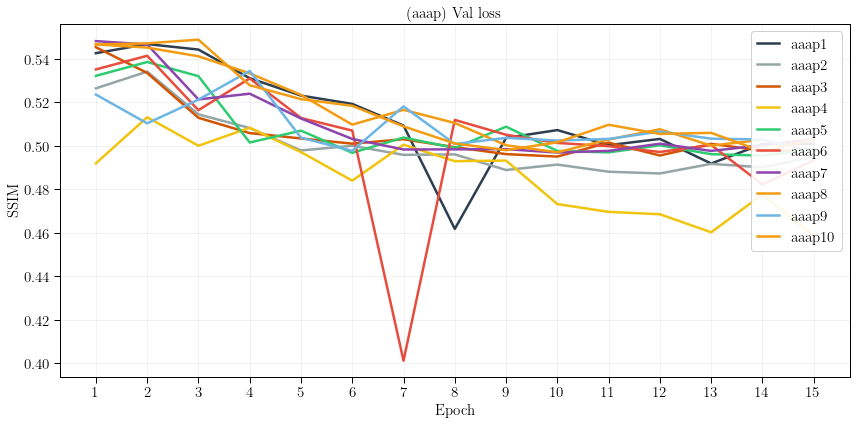

In [23]:
# Val loss for the 10 models

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(aaap) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for exp in aaap.keys():
    ssim_loss = []
    for epoch in aaap[exp].keys():
        ssim_loss.append(aaap[exp][epoch]['val_loss'])
    ax.plot(x, ssim_loss, color=colors[i], 
            label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()

['aaap1', 'aaap2', 'aaap3', 'aaap4', 'aaap5', 'aaap6', 'aaap7', 'aaap8', 'aaap9', 'aaap10']
[0.5467472808134586, 0.5340803421453304, 0.5452826060101165, 0.5130965511810696, 0.5384994931601047, 0.5413789052735368, 0.5481021497172252, 0.546596733416148, 0.5344171487219087, 0.5487760692851632]
[0.00028206660923748824, 0.0002049151689006133, 0.000646295993502517, 0.003544836234117165, 0.000240648212494361, 0.001509675401121426, 0.002019736657012312, 0.00044152126790105405, 0.0014746326567498746, 0.003125538613382397]


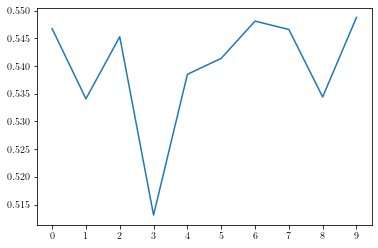

BEST MODELS ACCORDING TO SSIM:  [9 6 0 7 2 5] ['aaap10' 'aaap7' 'aaap1' 'aaap8' 'aaap3' 'aaap6']


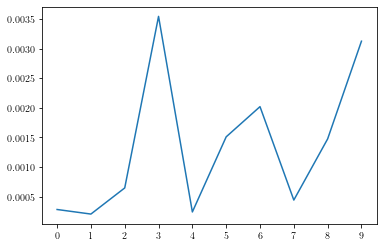

BEST MODELS ACCORDING TO SSIM:  [1 4 0 7 2 8] ['aaap2' 'aaap5' 'aaap1' 'aaap8' 'aaap3' 'aaap9']


In [43]:
# extract the best 3 models according to discloss and valloss and then decide

models = {}

max_ssim_losses = []
min_disc_losses = []
exps = []
for exp in aaap.keys():
    ssim_loss = []
    disc_loss = []
    for epoch in aaap[exp].keys():
        ssim_loss.append(aaap[exp][epoch]['val_loss'])
        disc_loss.append(aaap[exp][epoch]['disc_loss'])

    max_ssim_losses.append(max(ssim_loss))
    min_disc_losses.append(abs(disc_loss[-1]))
    exps.append(exp)

print(exps)
print(max_ssim_losses)
print(min_disc_losses)

BEST_N_EXPS = 6
# best in ssim
plt.figure()
plt.plot(max_ssim_losses)
plt.xticks(range(len(max_ssim_losses)))
plt.show()

ind = np.flip(np.argpartition(max_ssim_losses, -BEST_N_EXPS)[-BEST_N_EXPS:])
print("BEST MODELS ACCORDING TO SSIM: ", ind, np.array(exps)[ind])

# best 3 in disc
plt.figure()
plt.plot(min_disc_losses)
plt.xticks(range(len(min_disc_losses)))
plt.show()

ind = np.array(min_disc_losses).argsort()[:BEST_N_EXPS]
print("BEST MODELS ACCORDING TO SSIM: ", ind, np.array(exps)[ind])



### Experimento baab

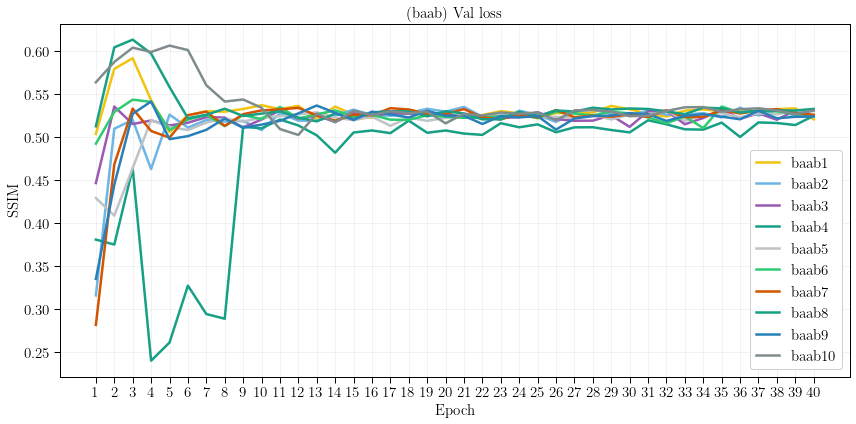

best ssim:  baab8 0.6137543415655067 3
baab1 0.5209263820991371
baab2 0.531454097147866
baab3 0.5313987135001412
baab4 0.525031479934365
baab5 0.5305941202771136
baab6 0.5253055179053114
baab7 0.526357489746142
baab8 0.5330697978953104
baab9 0.5242211697905352
baab10 0.5313037615208637


In [13]:
outputs = json.load(open('outputs/baab.json'))

# SSIM for every model

show_legend = True
colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(baab) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 41)
max_val = 0
exp = None
ep = None
i = 0
for exp in outputs.keys():
    ssim_loss = []
    for epoch in outputs[exp].keys():
        ssim_loss.append(outputs[exp][epoch]['val_loss'])
        if outputs[exp][epoch]['val_loss'] > max_val:
            max_val = outputs[exp][epoch]['val_loss']
            expp = exp
            ep = epoch
    ax.plot(x, ssim_loss, color=colors[i], 
            label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()
print("best ssim: ", expp, max_val, ep)

for exp in outputs.keys():
    ssim_loss = []
    for epoch in outputs[exp].keys():
        ssim_loss.append(outputs[exp][epoch]['val_loss'])
    print(exp, ssim_loss[-1])

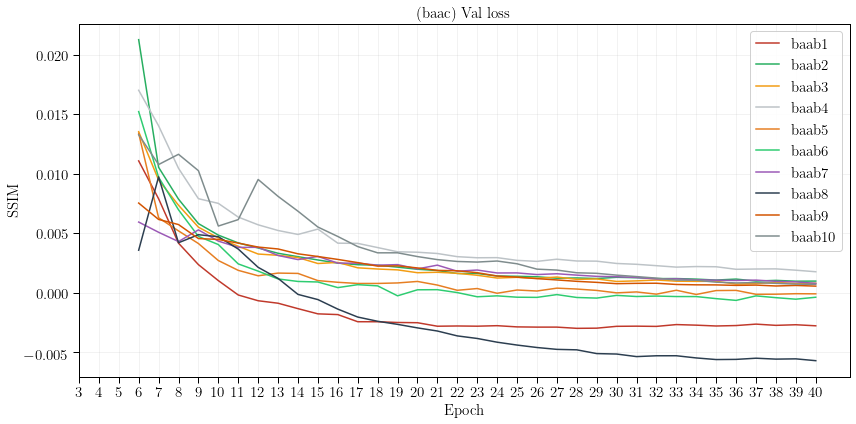

In [36]:
outputs = json.load(open('outputs/baab.json'))

# SSIM for every model

show_legend = True
colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(3, 41)
i = 0
for exp in outputs.keys():
    disc_loss = []
    for epoch in outputs[exp].keys():
        disc_loss.append(outputs[exp][epoch]['disc_loss'])
    ax.plot(x[3:], disc_loss[5:], color=colors[i], label=exp)
    i += 1

plt.xticks(x)

# Text over plots
show_legend = True
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


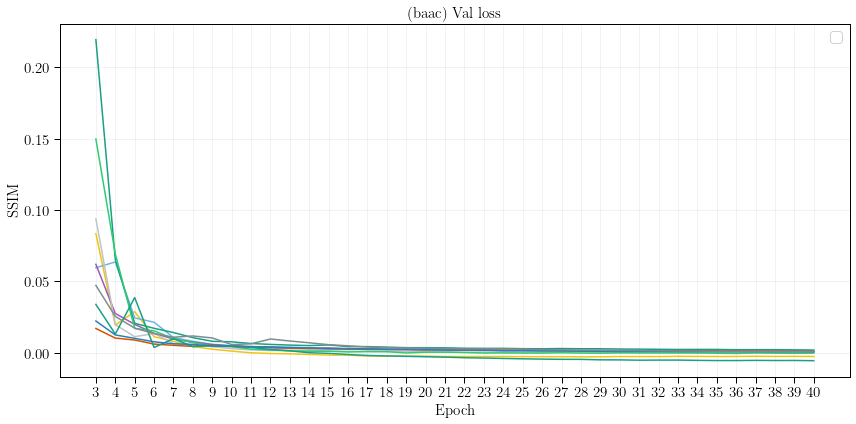

In [15]:
# determine the difference in percentaje of learning for each epoch in disc loss
outputs = json.load(open('outputs/baab.json'))

# SSIM for every model

show_legend = True
#colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(3, 41)
i = 0
for exp in outputs.keys():
    disc_loss = []
    # get vector for loss 
    for epoch in outputs[exp].keys():
        disc_loss.append(outputs[exp][epoch]['disc_loss'])
    
    ax.plot(x, disc_loss[2:], color=colors[i])
    i += 1

plt.xticks(x)

# Text over plots
show_legend = True
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()


### Experimentos baac

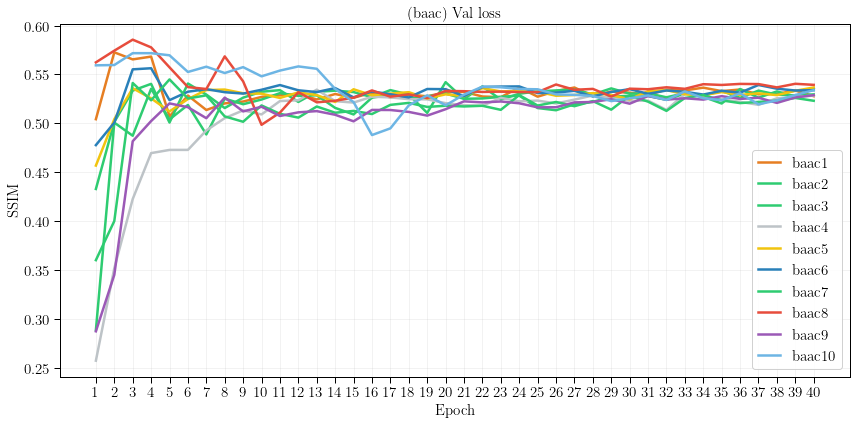

baac8 0.585644267336194 3


In [8]:
outputs = json.load(open('outputs/baac.json'))

# SSIM for every model

show_legend = True
#colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 41)
max_val = 0
exp = None
ep = None
i = 0
for exp in outputs.keys():
    ssim_loss = []
    for epoch in outputs[exp].keys():
        ssim_loss.append(outputs[exp][epoch]['val_loss'])
        if outputs[exp][epoch]['val_loss'] > max_val:
            max_val = outputs[exp][epoch]['val_loss']
            expp = exp
            ep = epoch
    ax.plot(x, ssim_loss, color=colors[i], 
            label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()

print(expp, max_val, ep)